In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


In [5]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [17]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [18]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [6]:
df = pd.concat([df1,df2,df3,df4,df5])

In [19]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
4,Aracaju,2018-01-01,24.51,1522,8
131,Recife,2019-03-02,139.07,982,6
12,Natal,2019-02-02,709.00,853,3
79,Fortaleza,2019-01-01,41.25,1005,6
121,Recife,2019-03-02,41.55,981,3


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df.head()


,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=False)

0      142.00
1       14.21
2       71.55
3        3.01
4       24.51
        ...  
235     41.84
236    126.29
237     38.06
238    139.64
239    161.41
Name: Vendas, Length: 894, dtype: float64

In [20]:
df["Vendas"].mean()

122.61180089485438

In [21]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde
58,Fortaleza,2019-01-01,38.9,1004,4


In [23]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
55,Salvador,2019-01-01,36.62,1036,1
67,Recife,2019-01-01,179.52,983,5
114,Natal,2019-01-02,25.52,1034,1
121,Fortaleza,2019-03-02,41.55,981,3
16,Salvador,2019-01-01,32.47,1036,2
72,Natal,2018-05-02,612.00,854,4
124,Natal,2019-01-02,44.82,1034,3
77,Recife,2019-01-01,102.82,981,6
168,Natal,2019-01-02,20.22,1036,1
14,Aracaju,2018-01-01,148.21,1521,3


In [14]:
df["Vendas"].fillna(0, inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#df.dropna(how="all", inplace=True)

In [29]:
#criando colunas
df["Receita"] = df["Vendas"].multiply(df["Qtde"])

In [30]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [33]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [34]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [35]:
#maior receita
df["Receita"].max()

3544.0

In [36]:
df["Receita"].min()

3.34

In [39]:
#nlargest - Qual loja vendeu mais
df.nlargest(3, "Receita") 


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [40]:
#nsmallestt - Qual loja vendeu menos

df.nsmallest(3, "Receita") 



,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [42]:
#Agrupamento por cidades
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [43]:
#Ordenando conjuntode dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [44]:
df["Data"] = df["Data"].astype("int64")

/tmp/ipykernel_1419/3919819208.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


In [45]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [46]:
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.groupby(df["Data"]).df.sum()

In [ ]:
#Trabalhando com Datas

In [47]:
df["Data"] = df["Data"].astype("int64")

/tmp/ipykernel_1419/3919819208.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


In [48]:
df["Data"] = pd.to_datetime(df["Data"])

In [49]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [50]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [51]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [52]:
df["Ano_Venda"] = df["Data"].dt.year

In [53]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
124,Aracaju,2018-01-01,139.64,1522,5,698.2,5.0,2018


In [74]:
# Extrair o dia e o mês de venda
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day) 

In [75]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,Diferença_Dias,Trimestre_Venda,Mes_Venda,Dia_Venda
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,4.0,2019,2,13,408 days,408 days,1,2,13
57,Natal,2019-02-24,425.00,854,4,1700.00,4.0,2019,2,24,419 days,419 days,1,2,24
214,Natal,2019-01-02,54.94,1036,2,109.88,2.0,2019,1,2,366 days,366 days,1,1,2
39,Aracaju,2018-01-01,11.11,1522,8,88.88,8.0,2018,1,1,0 days,0 days,1,1,1
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,2.0,2019,1,1,365 days,365 days,1,1,1


In [59]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [64]:
#Calculando a diferença de dias
df["Diferença_Dias"] = df["Data"] - df["Data"].min()


In [65]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,Diferença_Dias
171,Salvador,2019-01-02,136.45,1035,3,409.35,3.0,2019,1,2,366 days,366 days
43,Salvador,2019-01-01,12.21,1034,1,12.21,1.0,2019,1,1,365 days,365 days
87,Fortaleza,2019-01-01,42.04,1002,5,210.20,5.0,2019,1,1,365 days,365 days
135,Natal,2019-01-02,9.95,1037,3,29.85,3.0,2019,1,2,366 days,366 days
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,425 days


In [63]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [66]:
#Criando a coluna do Trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter


In [67]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,Diferença_Dias,Trimestre_Venda
50,Recife,2019-01-01,7.24,983,4,28.96,4.0,2019,1,1,365 days,365 days,1
33,Salvador,2019-01-01,144.19,1035,2,288.38,2.0,2019,1,1,365 days,365 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,425 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,425 days,1
58,Salvador,2019-01-01,20.64,1037,2,41.28,2.0,2019,1,1,365 days,365 days,1


In [72]:
#Filtrando as vendas
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [73]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,Diferença_Dias,Trimestre_Venda
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019,3,10,433 days,433 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,425 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,425 days,1
129,Recife,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,425 days,1
139,Recife,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,425 days,1


<AxesSubplot:>

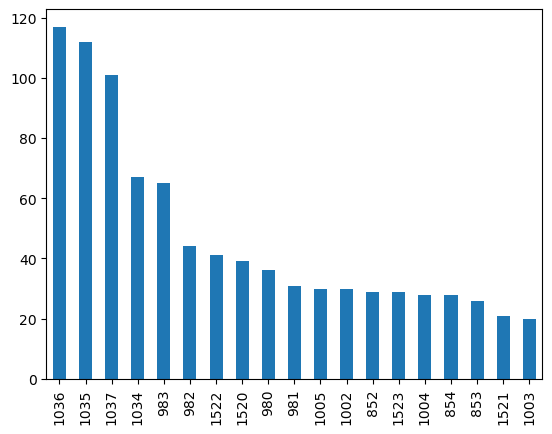

In [77]:
#Value Count
df["LojaID"].value_counts(ascending=False).plot.bar()

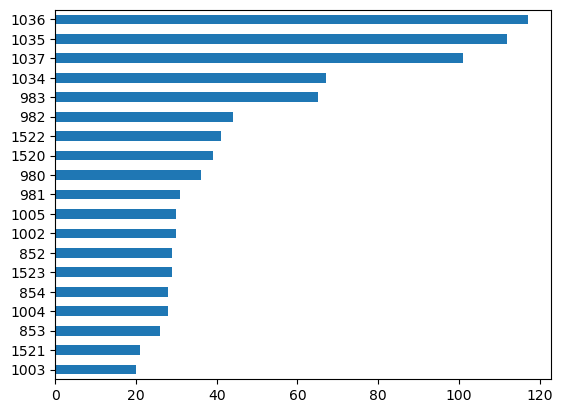

In [80]:
#Gráfico de Barras Horizontais
df["LojaID"].value_counts(ascending=True).plot.barh(); 

<AxesSubplot:ylabel='Receita'>

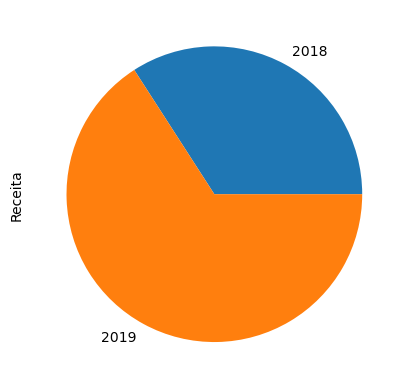

In [81]:
#Gráfico Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()


In [82]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [83]:
#Adicionar um título ealterar o nome dos eixos
import matplotlib.pyplot as plt


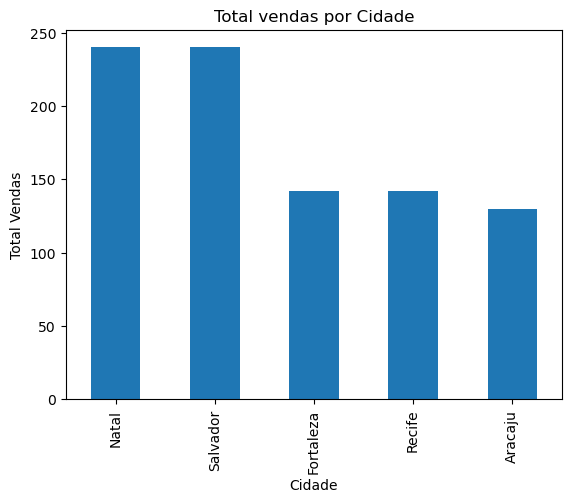

In [86]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas"); 

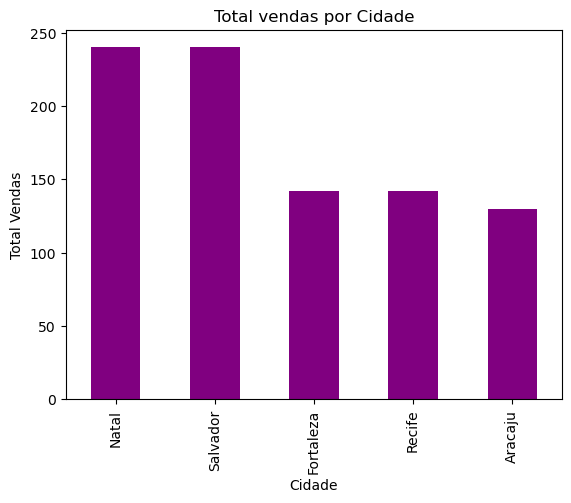

In [87]:
#Alterar a Cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="purple")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas"); 

In [94]:
#Alterar o estilo
plt.style.use("ggplot")

In [95]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle



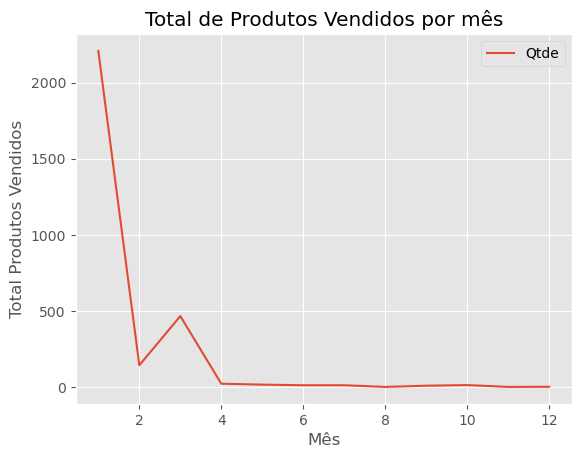

In [99]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title= "Total de Produtos Vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend() 

In [98]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [100]:
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

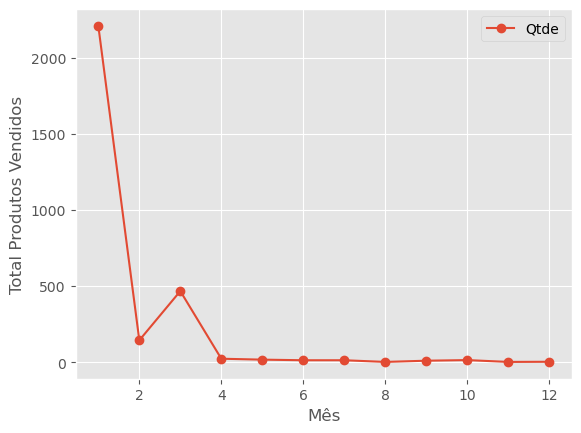

In [104]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend(); 

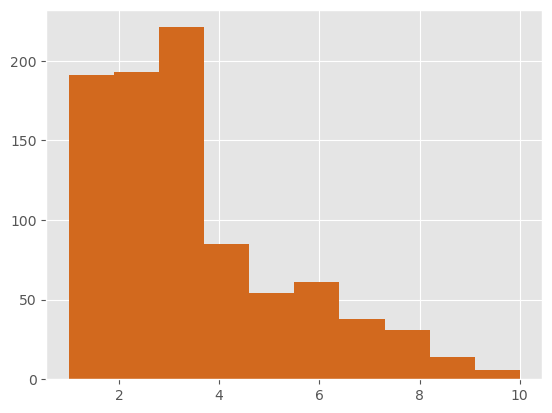

In [106]:
#Histograma
plt.hist(df["Qtde"], color="chocolate"); 

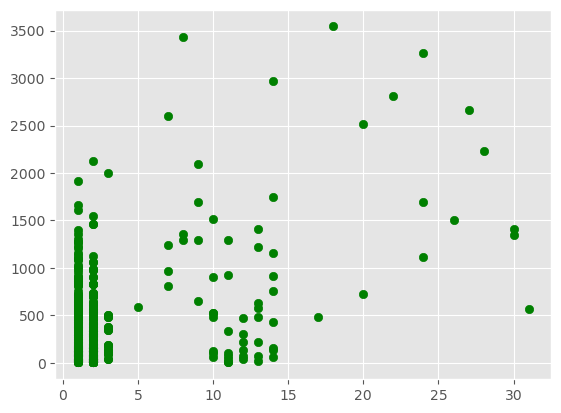

In [108]:
plt.scatter(x=df_2019["dia_venda"], y =df_2019["Receita"], color="green"); 

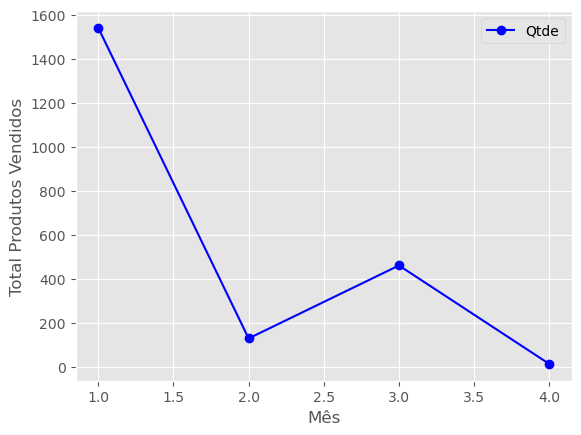

In [111]:
#Salvar em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", color="blue")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico Qtde X Mes.png") 

In [ ]:
#Análise Exploratória
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
